# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (24)

# `ALEJANDRO SÁNCHEZ MONZÓN`

**04/03/2024**

# Análisis de series temporales (Time Series)

In [1]:
# importamos las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

---

### **`Ejercicio 24.1`**

Vamos a analizar los datos de **`Sunspots Dataset`** que son números promediados mensuales de **manchas solares desde 1749 hasta 1983**. Esta serie temporal se ha recolectado en el _Observatorio Federal Suizo_ (_**Zúrich**_) hasta **1960**, luego en el _Observatorio Astronómico de Japón_ (**_Tokio_**).  

Los números de manchas solares son una *medida de la actividad solar*. Los datos vienen en las unidades originales utilizadas por los observadores de forma bruta y **no hay ajustes** por cambios en la instrumentación o sesgo del observador. 


**`24.1.1`** Utiliza el siguiente enlace para cargar estos datos y crear una tabla tipo _DataFrame_ con ellos:
 - 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'

**`24.1.2`** construye la serie temporal, del modo que las fechas tipo `'1749-05-01'` formen los índices, y los números de las manchas solares compongan los valores de la serie.

**`24.1.3`** Representa de forma gráfica los datos de la serie temporal con las siguientes visualizaciones:
 - Gráfica estática (_matplotlib_)
 - Gráfica interactiva (_plotly_)

**`24.1.4`** Aplica una descomposición de la serie temporal mediante el método `seasonal_decompose` y visualiza los componentes correspondientes.

**`24.1.5`** Aplica una descomposición de la serie temporal mediante el método `STL` y visualiza los componentes correspondientes.

**`24.1.6`** Saca la gráfica de ***correlograma*** para la serie temporal, considerando hasta el retraso indicado y analiza los patrones que ves presente en esta gráfica: 

 - `lags=200`

**`24.1.7`** Saca la gráfica de ***Autocorrelación parcial*** para la serie temporal, considerando hasta el retraso indicado y analiza los patrones que ves presente en esta gráfica: 

 - `lags=30`

**`24.1.8`** Saca la gráfica de las ***Características estadísticas*** y su evolución a lo largo de tiempo de **la serie temporal**, considerando una ventana con el tamaño indicado. Analiza y explica esta evolución de la media y de la varianza de los datos: 

 - `win = 200`

In [3]:
## Solución 24.1.1
df_sunspots = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv")

df_sunspots

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0
...,...,...
2815,1983-08,71.8
2816,1983-09,50.3
2817,1983-10,55.8
2818,1983-11,33.3


In [4]:
## Solución 24.1.2
df_sunspots["dates"] = pd.to_datetime(df_sunspots['Month'], format='%Y-%m')

df_sunspots.set_index("dates", inplace=True)

df_sunspots.drop(columns='Month', inplace=True)

df_sunspots

,Sunspots
dates,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0
...,...
1983-08-01,71.8
1983-09-01,50.3
1983-10-01,55.8


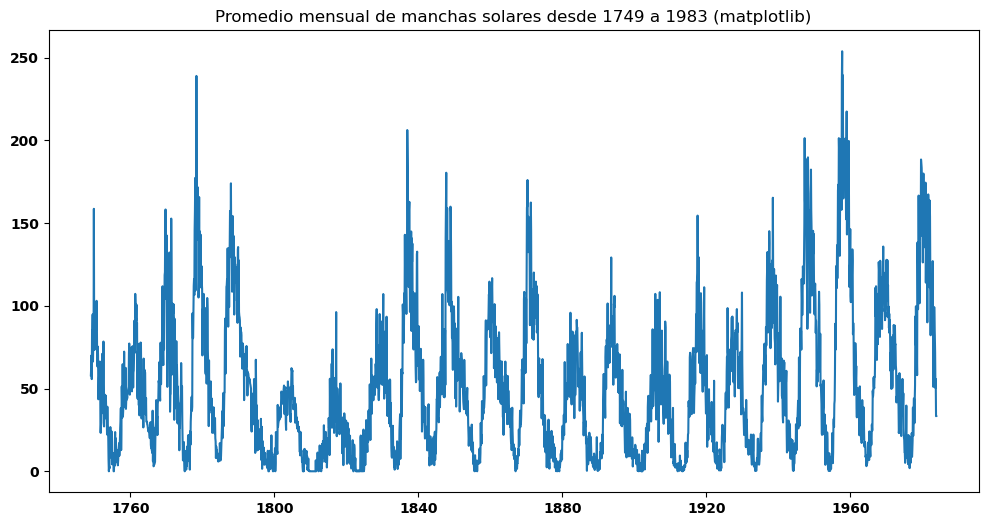

In [5]:
## Solución 24.1.3
plt.plot(df_sunspots)
plt.title("Promedio mensual de manchas solares desde 1749 a 1983 (matplotlib)")
plt.show()

In [6]:
import plotly.graph_objects as go

fig_sun = go.Figure()

fig_sun.add_trace(go.Scatter(
    x=df_sunspots.index,
    y=df_sunspots['Sunspots'],
    mode="markers+lines"
    ))

fig_sun.update_layout(title="Promedio mensual de manchas solares desde 1749 a 1983 (plotly)",
                  title_font_size=26,
                  xaxis_title = 'Fecha',
                  yaxis_title= 'Manchas solares'
                  )

fig_sun.show()

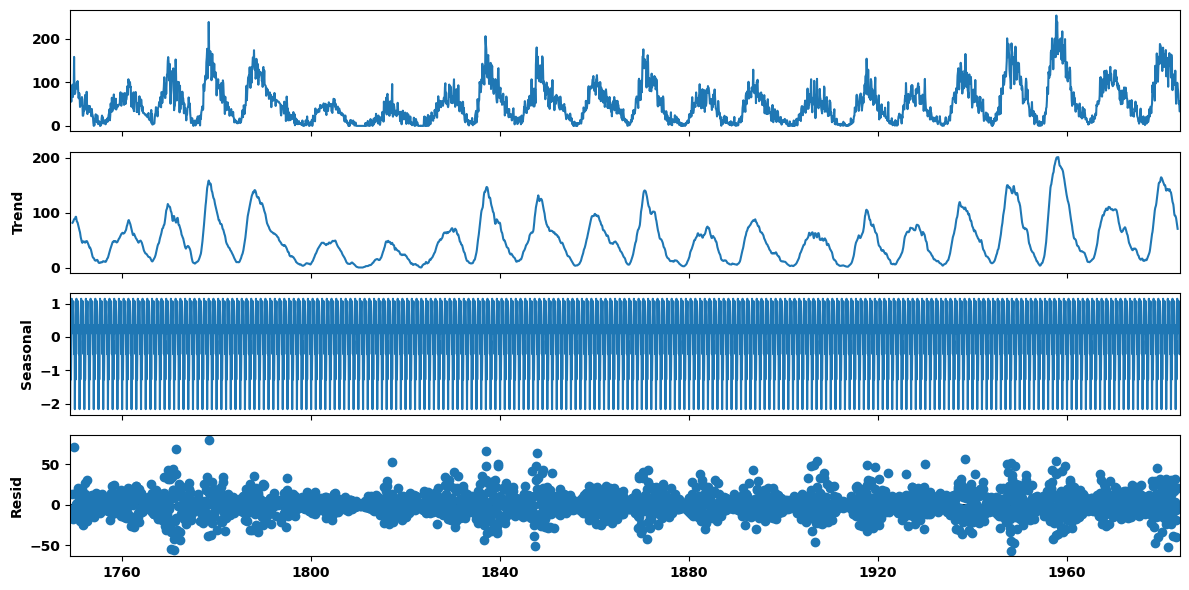

In [7]:
## Solución 24.1.4
from statsmodels.tsa.seasonal import seasonal_decompose

df_sun_des = seasonal_decompose(df_sunspots)

df_sun_des.plot()
plt.show()

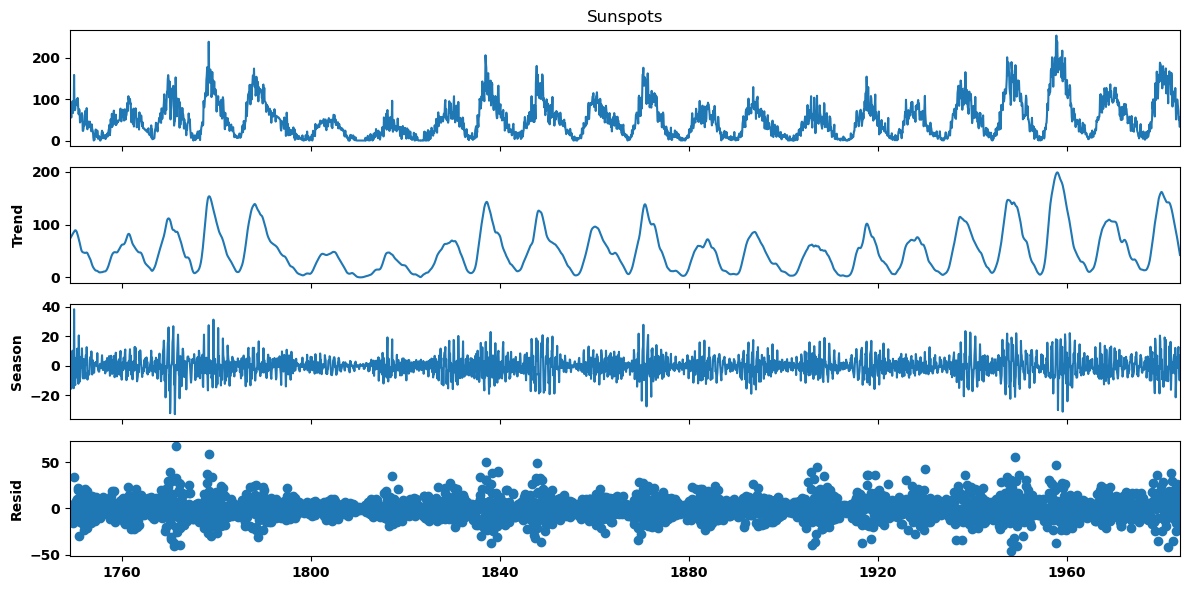

In [8]:
## Solución 24.1.5
from statsmodels.tsa.seasonal import STL

df_suns_stl = STL(df_sunspots['Sunspots']).fit()

df_suns_stl.plot()
plt.show()

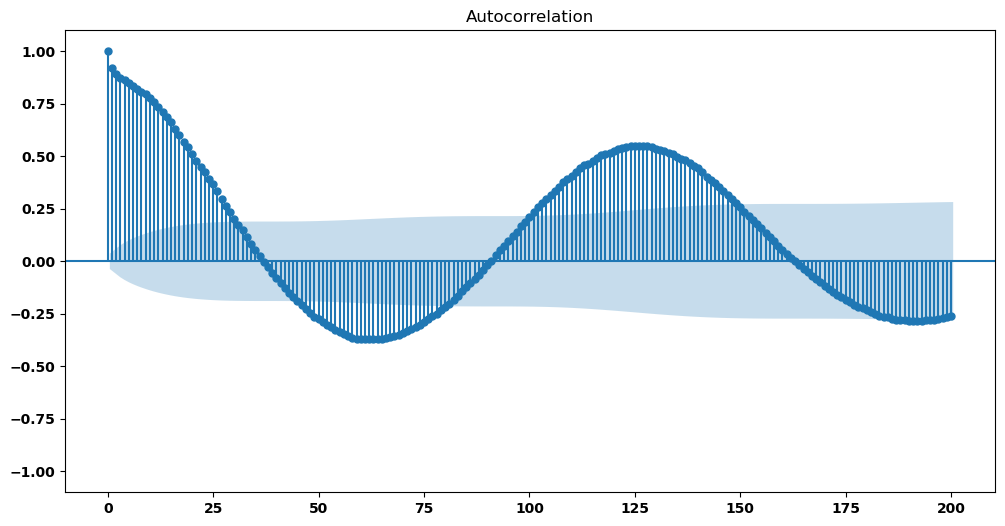

In [9]:
## Solución 24.1.6
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_sunspots, lags=200)
plt.ylim(-1.1,1.1)
plt.show()

> #### Explicación 24.1.6
> Podemos observar una gráfica con valores muy cercanos a 1 inicialmente, y poco a poco van bajando hasta oscilar entre 0.5 y -0.5. Podemos observar también que sigue un patrón similar al de una onda sinusoidal. Podemos observar también que cuando los valores se salen del humbral de 0.2 o -0.2, dejan de estar dentro de la zona de confianza, esto coincide con los momentos de picos de la gráfica, tanto positiva como negativamente. Podemos deducir que los valores de la serie temporal tienen una correlación directa con los valores anteriores.

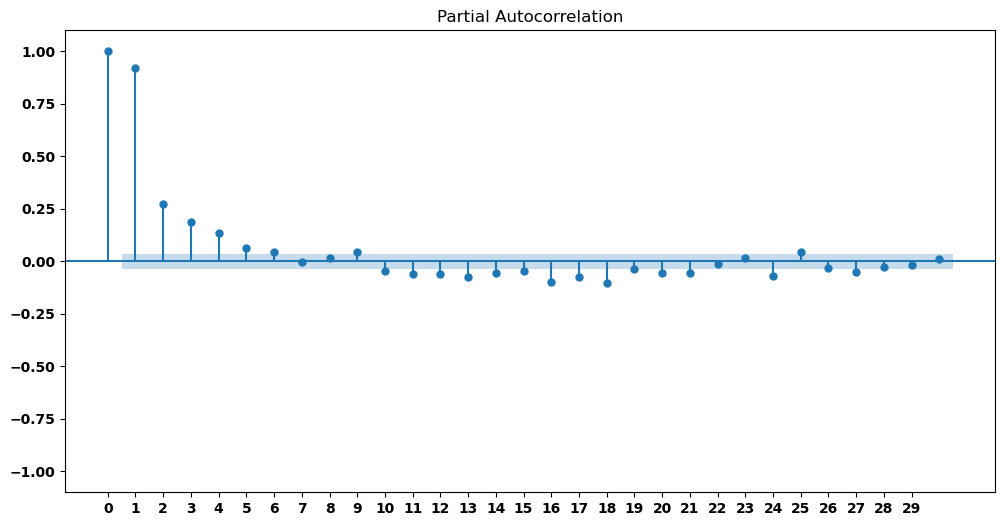

In [10]:
## Solución 24.1.7
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df_sunspots, lags=30, method='ywm')
plt.xticks(np.arange(30))
plt.ylim(-1.1,1.1)
plt.show()

> #### Explicación 24.1.7
> Podemos ver valores muy cercanos a 0 principalmente, tanto por arriba como por debajo, siendo la zona de confianza para esta gráfica mucho, más pequeña. Esto nos da a entender que loa valores actuales de la serie no estan significativamente influenciados por sus valores anteriores, lo que no nos sirve del todo para predecir valores futuros.

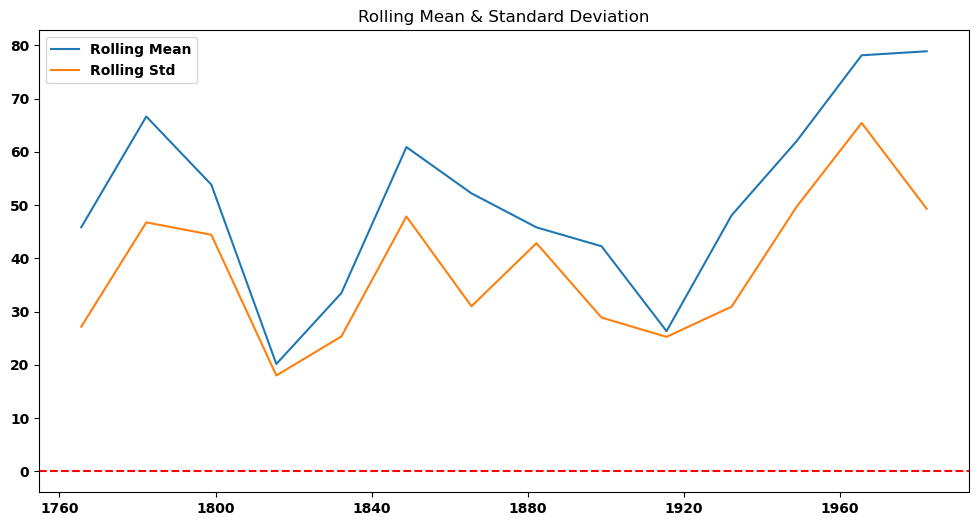

In [11]:
## Solución 24.1.8
win_sun = 200
rolmean = df_sunspots['Sunspots'].rolling(win_sun).mean().iloc[win_sun-1::win_sun]
rolstd = df_sunspots['Sunspots'].rolling(win_sun).std().iloc[win_sun-1::win_sun]

plt.plot(rolmean, label='Rolling Mean')
plt.plot(rolstd, label = 'Rolling Std')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Rolling Mean & Standard Deviation')
plt.legend()
plt.show()

> #### Explicación 24.1.8
> Podemos observar que todos los valores de la gráfica se encuentran por encima de 0. No como en series temporales anteriores en esta sesión, donde podíamos ver que si que se encontraba en sectores positivos y negativos. Podemos observar tambien que, a pesar de haber una gran cantidad de picos, ambas líneas se mantienen cercanas una de otra, siguiendo recorridos parecidos. Podemos observar que según aumenta el tiempo, aumenta tanto la media como la desviación, lo que nos puede dar a entender que a medida que aumenta el valor medio de la serie temporal, también aumenta su variabilidad.

---